# Red Wine Quality Classification

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv("/content/drive/MyDrive/ML Datasets/Classification/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [36]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [37]:
df.shape

(1599, 12)

In [66]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

## Basic EDA

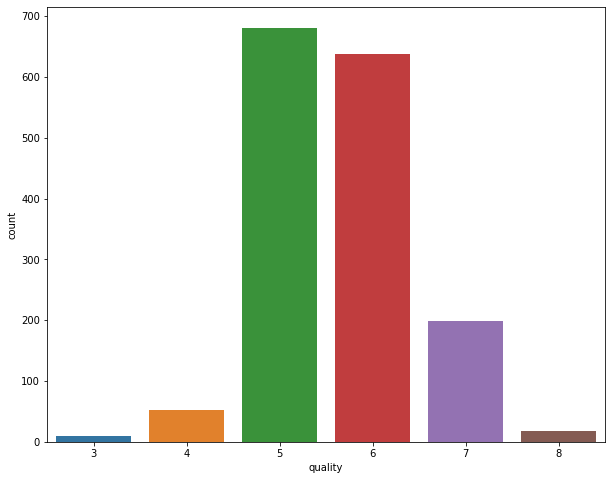

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(x='quality',data=df)
plt.show()

In [39]:
corr_mat = df.corr()
corr_mat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


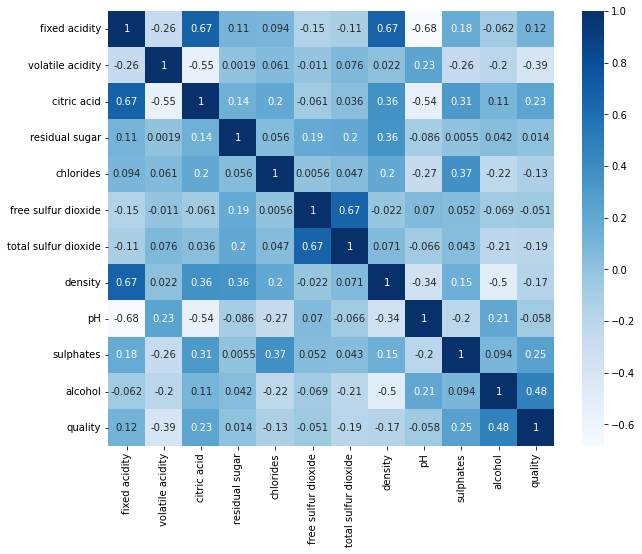

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat,cmap='Blues',annot=True)
plt.show()

# Data Preprocessing

In [42]:
x = df.drop(columns=['quality'])
y = df['quality']
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [43]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [44]:
# Oversampling the dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x1,y1=smote.fit_sample(x,y)
x1[:5]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

array([[7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00],
       [7.800e+00, 8.800e-01, 0.000e+00, 2.600e+00, 9.800e-02, 2.500e+01,
        6.700e+01, 9.968e-01, 3.200e+00, 6.800e-01, 9.800e+00],
       [7.800e+00, 7.600e-01, 4.000e-02, 2.300e+00, 9.200e-02, 1.500e+01,
        5.400e+01, 9.970e-01, 3.260e+00, 6.500e-01, 9.800e+00],
       [1.120e+01, 2.800e-01, 5.600e-01, 1.900e+00, 7.500e-02, 1.700e+01,
        6.000e+01, 9.980e-01, 3.160e+00, 5.800e-01, 9.800e+00],
       [7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00]])

In [45]:
y1[:5]

array([5, 5, 5, 6, 5])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


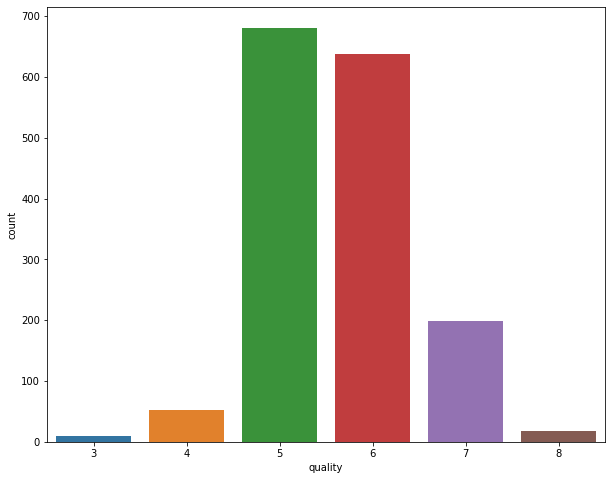

In [46]:
# Before Oversampling 
plt.figure(figsize=(10,8))
sns.countplot(y)
plt.show()

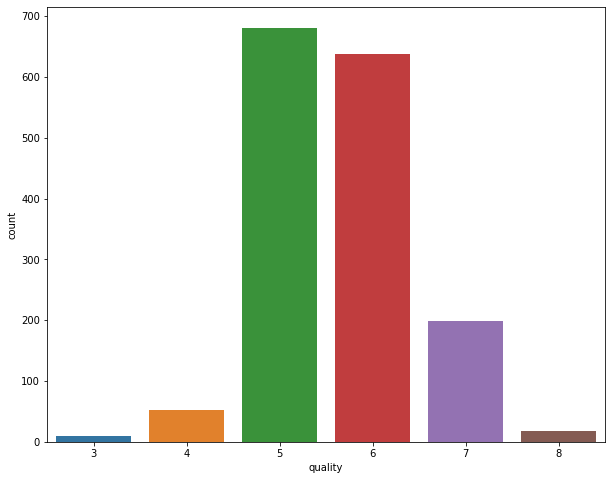

In [47]:
# After Sampling
plt.figure(figsize=(10,8))
sns.countplot(x='quality',data=df)
plt.show()

In [48]:
# Splitting the Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=0)
x_train[:5],x_test[:5]

(array([[7.63394000e+00, 8.92551291e-01, 6.01367747e-03, 3.01435032e+00,
         8.83325612e-02, 2.82551291e+01, 6.46082065e+01, 9.99280295e-01,
         3.62255129e+00, 6.83917935e-01, 9.90523936e+00],
        [9.20990894e+00, 3.63363685e-01, 5.21981789e-01, 2.16636315e+00,
         7.42972683e-02, 6.63363685e+00, 1.63663631e+01, 9.95272126e-01,
         3.18801821e+00, 7.74263524e-01, 1.22069095e+01],
        [7.95930436e+00, 3.57974371e-01, 3.97937758e-01, 1.73996339e+00,
         6.49963387e-02, 4.59853549e+00, 1.41989016e+01, 9.95448505e-01,
         3.22200732e+00, 9.36150113e-01, 1.09990847e+01],
        [7.43608990e+00, 9.62163178e-01, 3.52573893e-02, 2.14123768e+00,
         7.25465516e-02, 1.24123768e+01, 2.89381158e+01, 9.96037131e-01,
         3.45226724e+00, 4.42371305e-01, 1.06577217e+01],
        [9.31462615e+00, 3.13659816e-01, 5.47478502e-01, 2.78292523e+00,
         7.97723364e-02, 6.11383180e+00, 1.70000000e+01, 9.96169491e-01,
         3.15284579e+00, 9.08616820e-0

In [49]:
y_train[:5],y_test[:5]

(array([4, 8, 8, 4, 8]), array([7, 3, 4, 3, 7]))

In [58]:
# Standardizing
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
x_train_std = std_scale.fit_transform(x_train)
x_test_std = std_scale.transform(x_test)

In [59]:
x_train_std[:5],x_test_std[:5]

(array([[-0.44697726,  1.23276078, -1.31365159,  0.35814238, -0.03212555,
          1.55808344,  0.98935227,  1.49061725,  1.90612271,  0.12717498,
         -0.68120343],
        [ 0.51879587, -0.88331577,  1.21076717, -0.34790958, -0.31867675,
         -0.68222725, -0.68782551, -0.67478109, -0.87624347,  0.66829934,
          1.28624775],
        [-0.24758998, -0.90486616,  0.60387098, -0.70293899, -0.50856895,
         -0.89309425, -0.76317956, -0.57949306, -0.65860721,  1.63791809,
          0.25380774],
        [-0.56822223,  1.51111969, -1.17057419, -0.36882957, -0.35442022,
         -0.08346316, -0.25075547, -0.26149038,  0.81577401, -1.3195671 ,
         -0.03798691],
        [ 0.58296786, -1.08206795,  1.33551205,  0.16545298, -0.20689516,
         -0.73608684, -0.66579647, -0.18998332, -1.10145657,  1.4730076 ,
          0.92105698]]),
 array([[ 0.45180118, -1.134114  ,  0.32498963, -0.48398912, -0.5299867 ,
         -0.12619159, -0.38766816, -0.73523043, -0.41233592,  1.06027

## Model Creation

In [61]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train_std,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
y_pred = lr_model.predict(x_test_std)
y_pred[:5],y_test[:5]

(array([7, 3, 3, 3, 8]), array([7, 3, 4, 3, 7]))

In [71]:
print("Train Score : ",lr_model.score(x_train_std,y_train)*100)
print("Test Score : ",lr_model.score(x_test_std,y_test)*100)

Train Score :  59.883720930232556
Test Score :  58.31295843520783


In [72]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train_std,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
y_pred = rf_model.predict(x_test_std)
y_pred[:5],y_test[:5]

(array([7, 3, 4, 3, 8]), array([7, 3, 4, 3, 7]))

In [74]:
print("Train Score : ",rf_model.score(x_train_std,y_train)*100)
print("Test Score : ",rf_model.score(x_test_std,y_test)*100)

Train Score :  100.0
Test Score :  85.94132029339853
